In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(RColorBrewer))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ggalluvial))
suppressMessages(library(ggpubr))

rescale <- function(x, CDS_start,CDS_end) ( (x-CDS_start)/(CDS_end - CDS_start) * 100)
confidence_interval_upper <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean + error
  return(result)
}
confidence_interval_lower <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean - error
  return(result)
}

# Figure 1

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig01.RData")

In [4]:
# head(out)

In [5]:
# head(gencode)

In [6]:
# head(lr_suppa)

In [7]:
# head(gen_suppa)

In [8]:
# head(AS_susceptibility_pathway)

In [9]:
nrow(out) # the total number of isoforms
length(unique(out$associated_gene)) # the total number of genes

[1] 159369

[1] 17496


	Wilcoxon rank sum test with continuity correction

data:  log(gencode$transcript_length) and log(out$transcript_length)
W = 1.2812e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


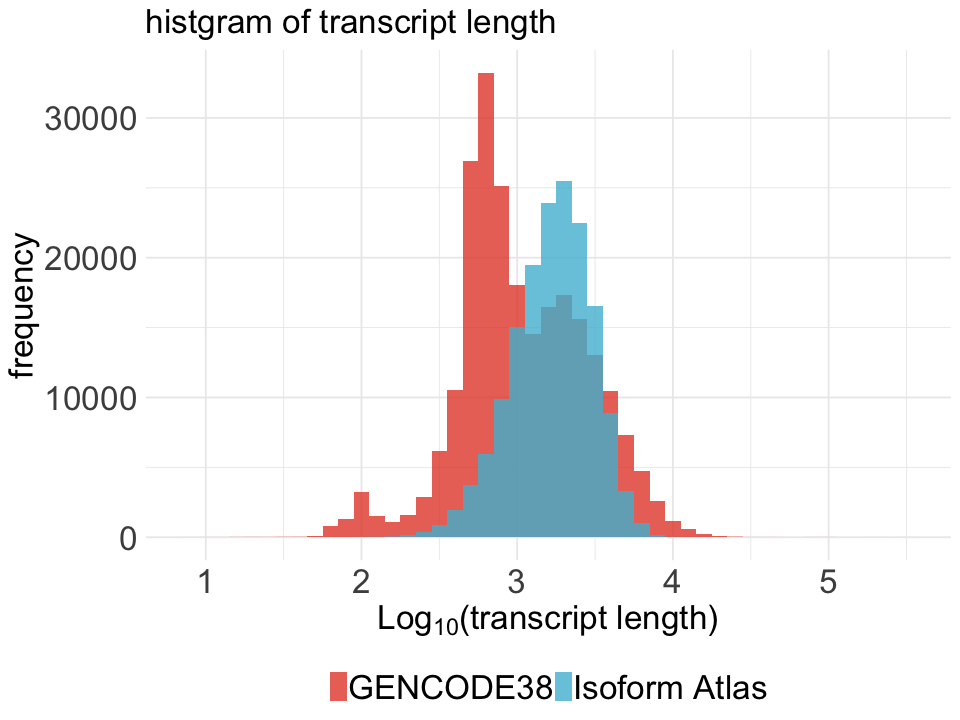

In [10]:
# compare the length of transcripts with those of GENCODE38
# summary(out$transcript_length)
# summary(gencode$transcript_length)

wilcox.test(log(gencode$transcript_length),log(out$transcript_length))

options(repr.plot.width=8, repr.plot.height=6)
rbind(
  out[,c("isoform","transcript_length","associated_gene")] %>%
    dplyr::mutate(group = "Isoform Atlas"),
  gencode[,c("isoform","transcript_length","associated_gene")] %>%
    dplyr::mutate(group = "GENCODE38")
) %>% 
  ggplot(., aes(x = log10(transcript_length), fill = group)) + 
  geom_histogram(position = "identity", alpha = 0.8,binwidth = 0.1) + 
  ggtitle("histgram of transcript length") +
  ylab(paste0("frequency")) +
  xlab(expression(paste({Log[10]}, "(transcript length)", sep=""))) +
  theme_minimal() +
  scale_fill_npg() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))




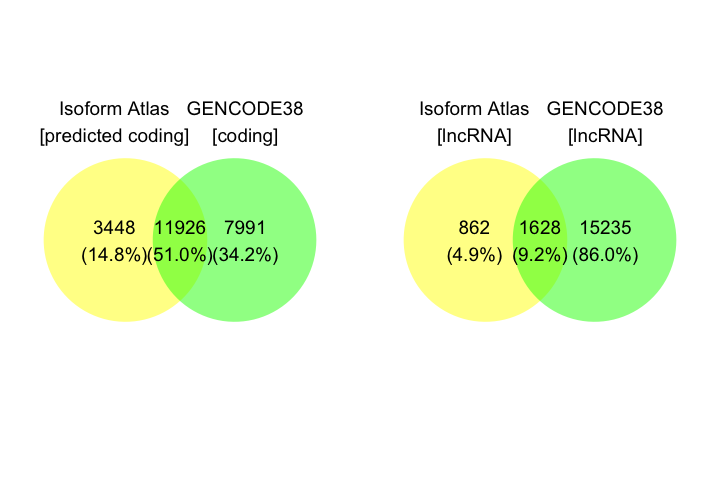

In [11]:
options(repr.plot.width=6, repr.plot.height=4)

# genes overlapped with GENCODE38
x <- list(
  `Isoform Atlas\n[predicted coding]` = out[out$coding,]$associated_gene,
  `GENCODE38\n[coding]` = gencode[gencode$gene_type=="protein_coding",]$associated_gene
)
g1 = ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",")
x <- list(
  `Isoform Atlas\n[lncRNA]` = out[out$gene_biotype=="lncRNA" | out$gene_biotype=="lincRNA",]$associated_gene,
  `GENCODE38\n[lncRNA]` = gencode[gencode$gene_type=="lncRNA" | gencode$gene_type=="lincRNA",]$associated_gene
)
g2 = ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",") 
ggpubr::ggarrange(g1,g2)


In [12]:
# specific coding-genes in isoform atlas
# setdiff(out[out$coding,]$associated_gene,
#         gencode[gencode$gene_type=="protein_coding",]$associated_gene)

In [13]:
# specific lncRNA in Isoform Atlas
# setdiff(out[out$gene_biotype=="lncRNA",]$associated_gene,
#         gencode[gencode$gene_type=="lncRNA",]$associated_gene)


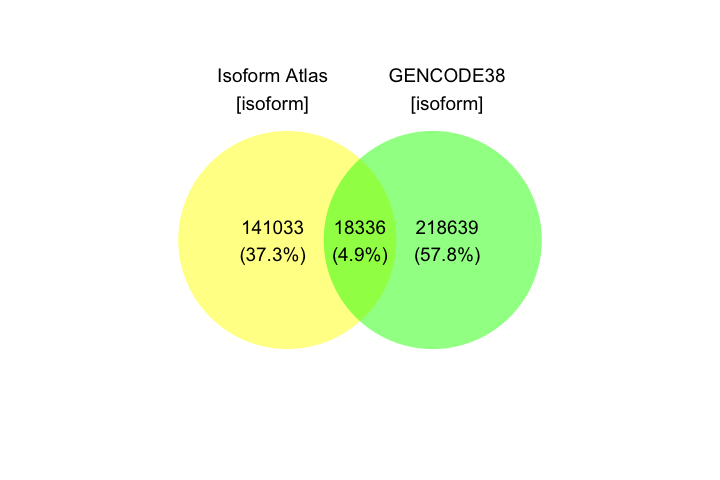

In [14]:
options(repr.plot.width=6, repr.plot.height=4)

## isoform level
## isoforms overlapped with GENCODE38
x <- list(
  `Isoform Atlas\n[isoform]` = out$isoform,
  `GENCODE38\n[isoform]` = gencode$isoform
)
ggvenn::ggvenn(x, 
               show_elements = FALSE, show_percentage = TRUE, 
               digits = 1, fill_color = c("yellow", "green"), 
               fill_alpha = 0.5, stroke_color = "white", stroke_alpha = 0.5, 
               stroke_size = 0, stroke_linetype = "solid", set_name_color = "black", 
               set_name_size = 4, text_color = "black", text_size = 4, label_sep = ",") 


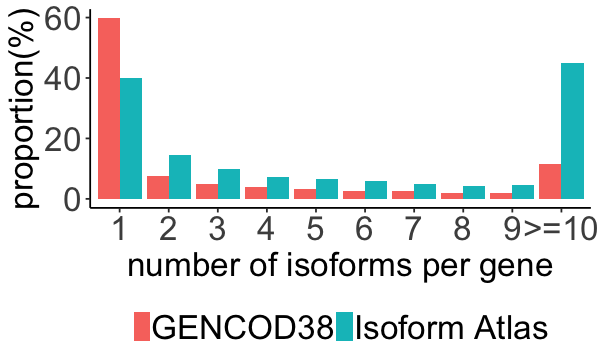

In [22]:
options(repr.plot.width=5, repr.plot.height=3)

# the counts of isoforms per gene

rbind(out %>%
        # dplyr::filter(gene_biotype == "protein_coding") %>%
        dplyr::group_by(associated_gene) %>%
        dplyr::summarise(count = dplyr::n()) %>%
        dplyr::arrange(count) %>%
        as.data.frame() %>%
        dplyr::group_by(count) %>%
        dplyr::summarise(isoform_count = dplyr::n()) %>%
        as.data.frame() %>%
        dplyr::mutate(count = ifelse(count>=10, ">=10", count),
                     count = factor(count,levels = c("1","2","3","4","5","6","7","8","9",">=10"))) %>%
        dplyr::group_by(count) %>%
        dplyr::mutate(isoform_count = sum(isoform_count),
                      proportion = 100*isoform_count/length(unique(out[out$gene_biotype == "protein_coding", ]$associated_gene)),
                      group = "Isoform Atlas") %>%
        as.data.frame() %>%
        unique(),
      gencode %>%
        # dplyr::filter(transcript_type == "protein_coding") %>%
        dplyr::group_by(associated_gene) %>%
        dplyr::summarise(count = dplyr::n()) %>%
        dplyr::arrange(count) %>%
        as.data.frame() %>%
        dplyr::group_by(count) %>%
        dplyr::summarise(isoform_count = dplyr::n()) %>%
        as.data.frame() %>%
        dplyr::mutate(count = ifelse(count>=10, ">=10", count),
                     count = factor(count,levels = c("1","2","3","4","5","6","7","8","9",">=10"))) %>%
        dplyr::group_by(count) %>%
        dplyr::mutate(isoform_count = sum(isoform_count),
                      proportion = 100*isoform_count/length(unique(gencode %>%
                                                                      .$associated_gene)),
                      group = "GENCOD38") %>%
        as.data.frame() %>%
        unique()
) %>%
  ggplot(., aes(x = count, y = proportion, fill = group)) + 
  geom_bar(position="dodge", stat="identity") +
  xlab(paste0("number of isoforms per gene")) + 
  ylab(paste0("proportion(%)")) +
  theme_classic() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))



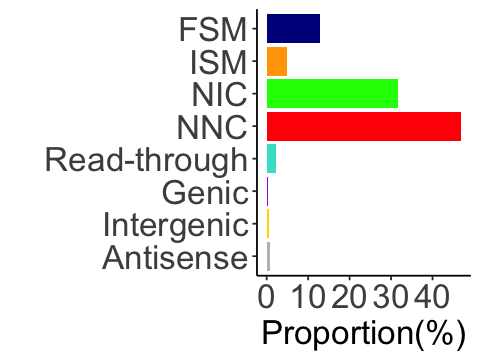

In [16]:
options(repr.plot.width=4, repr.plot.height=3)

# structural category by SQANTI3 in comparison with GENCODE38

out %>%
  dplyr::group_by(structural_category_SQANTI3) %>%
  dplyr::summarise(count = dplyr::n()) %>%
  dplyr::mutate(structural_category_SQANTI3 = case_when(
    structural_category_SQANTI3 == "full-splice_match" ~ "FSM",
    structural_category_SQANTI3 == "incomplete-splice_match" ~ "ISM",
    structural_category_SQANTI3 == "novel_in_catalog" ~ "NIC",
    structural_category_SQANTI3 == "novel_not_in_catalog" ~ "NNC",
    structural_category_SQANTI3 == "intergenic" ~ "Intergenic",
    structural_category_SQANTI3 == "antisense" ~ "Antisense",
    structural_category_SQANTI3 == "fusion" ~ "Read-through",
    structural_category_SQANTI3 == "genic" ~ "Genic",
    TRUE ~ structural_category_SQANTI3
  ),
               structural_category_SQANTI3 = forcats::fct_rev(factor(structural_category_SQANTI3,levels=c("FSM","ISM","NIC","NNC","Read-through","Genic","Intergenic","Antisense")))) %>%
  dplyr::mutate(proportion = 100*count/sum(count)) %>%
  dplyr::arrange(proportion) %>%
  as.data.frame() %>%
  ggplot(., aes(x = structural_category_SQANTI3, y = proportion, fill = structural_category_SQANTI3)) + 
  geom_bar(position="dodge", stat="identity") +
  scale_fill_manual(values=c("FSM" = "darkblue","ISM" = "orange","NIC" = "green","NNC" = "red","Read-through" = "turquoise","Genic" = "purple","Intergenic" = "gold" ,"Antisense" = "grey")) +
  xlab(paste0("")) + 
  ylab(paste0("Proportion(%)")) +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))




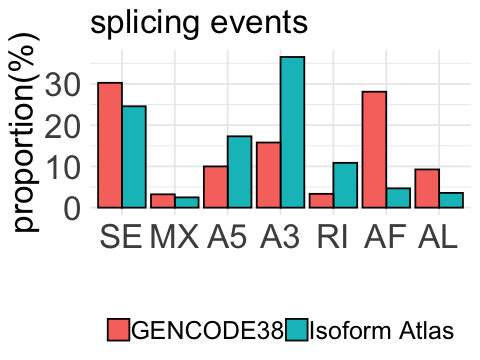

In [17]:
options(repr.plot.width=4, repr.plot.height=3)

# splicing events by SUPPA2
rbind(
  lr_suppa %>%
    # dplyr::filter(alternative_transcripts %in% squanti[squanti$min_cov>0,]$isoform) %>%  # min_cov: minimum junction coverage based on short read STAR junction output file. NA if no short read given.
    tidyr::separate_rows(.,alternative_transcripts, sep = ",", convert = TRUE) %>%
    dplyr::mutate(event_id = stringr::str_split(event_id,pattern=";",simplify=TRUE) %>% .[,2] %>% stringr::str_split(.,pattern=":",simplify=TRUE) %>% .[,1]) %>%
    dplyr::select(c(event_id,alternative_transcripts)) %>%
    dplyr::group_by(event_id) %>%
    dplyr::summarise(count = n()) %>%
    dplyr::filter(event_id!="") %>%
    dplyr::mutate(proportion = 100*count/sum(count),
                  group = "Isoform Atlas",
                  event_id = factor(event_id, levels = c("SE","MX","A5","A3","RI","AF","AL"))),
  gen_suppa %>%
    tidyr::separate_rows(.,alternative_transcripts, sep = ",", convert = TRUE) %>%
    dplyr::mutate(event_id = stringr::str_split(event_id,pattern=";",simplify=TRUE) %>% .[,2] %>% stringr::str_split(.,pattern=":",simplify=TRUE) %>% .[,1]) %>%
    dplyr::select(c(event_id,alternative_transcripts)) %>%
    dplyr::group_by(event_id) %>%
    dplyr::summarise(count = n()) %>%
    dplyr::filter(event_id!="") %>%
    dplyr::mutate(proportion = 100*count/sum(count),
                  group = "GENCODE38",
                  event_id = factor(event_id, levels = c("SE","MX","A5","A3","RI","AF","AL")))
) %>%
  # dplyr::group_by(event_id) %>%
  # dplyr::mutate(diff = max(proportion)-min(proportion)) %>%
  # as.data.frame() %>%
  # dplyr::arrange(-diff) %>%
  # dplyr::mutate(event_id = factor(event_id,levels=unique(event_id))) %>%
  ggplot(data=., aes(x=event_id, y=proportion, fill=group)) +
  geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_minimal() + 
  ggtitle ("splicing events") +
  ylab("proportion(%)") +
  xlab("") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

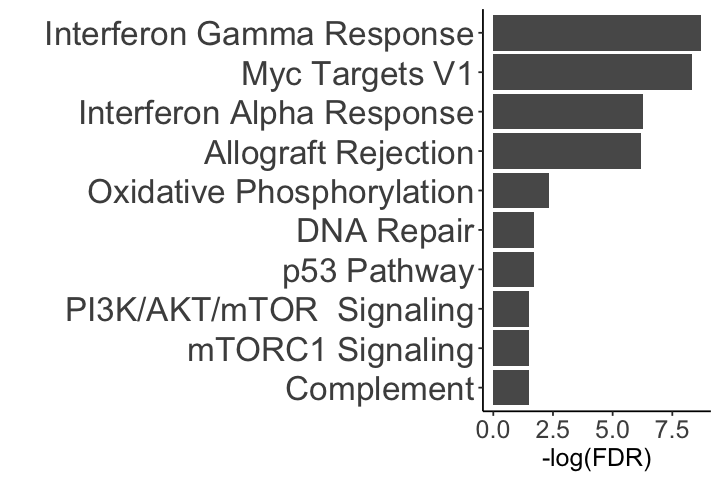

In [18]:
options(repr.plot.width=6, repr.plot.height=4)

# pathway of AS susceptible genes
AS_susceptibility_pathway %>%
  dplyr::filter(`Adjusted P-value` < 0.05) %>%
  dplyr::mutate(logFDR = -log10(`Adjusted P-value`),
                label = ifelse(`Adjusted P-value`<0.001, "***", ifelse(`Adjusted P-value`<0.01, "**", ifelse(`Adjusted P-value`<0.05, "*", "")))) %>%
  ggplot(., aes(x = reorder(x = Term, X = logFDR, FUN = sum), y = logFDR)) + 
  geom_bar(stat = "identity") +
  ylab("-log(FDR)") +
  xlab("") +
  # ggtitle("pathway analysis of AS susceptible genes") +
  coord_flip() +
  theme_classic() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))